<h1 align="center"> ECE4076/5176 - Week 9 </h1>
<h1 align="center"> Understanding the Gradient Descent Algorithm </h1>



You need to have the following packages to work with this notebook
- [numpy](https://anaconda.org/anaconda/numpy)
- [matplotlib](https://anaconda.org/conda-forge/matplotlib)
- [sklearn](https://scikit-learn.org/stable/install.html)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D

from jupyterquiz import display_quiz
import json
with open("./Questions_week_9.json", "r") as file:
    questions = json.load(file)

np.random.seed(2025)

## The Himmelblau function

In this demo, we are interested in minimizing the Himmelblau function. The  [Himmelblau](https://en.wikipedia.org/wiki/Himmelblau%27s_function) function is
used to test the performance of optimization algorithms and is named after David Himmelblau (1924–2011), who introduced it.


The  function is defined as:
\begin{align} 
z = (x^2+y-11)^2 + (x+y^2-7)^2\;. 
\end{align}


Below we define the function.  

In [19]:
def Himmelblau_func(x,y):
    z = (x**2 + y - 11)**2 + (x + y**2 - 7)**2
    return z

We start by plotting the function so we can understand it better.

C:\Users\jiunh\AppData\Local\Temp\ipykernel_22804\3776552738.py:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


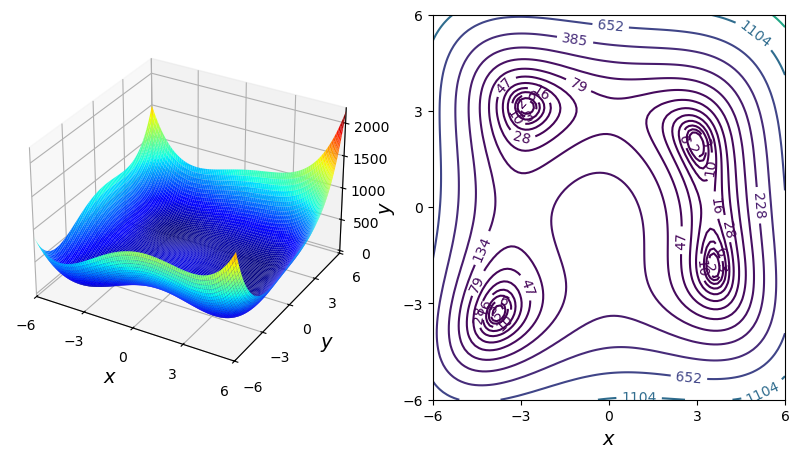

In [20]:
x_plt_array = np.linspace(-6,6,100)
y_plt_array = np.linspace(-6,6,100)
x_mesh, y_mesh = np.meshgrid(x_plt_array,y_plt_array)
z_mesh = Himmelblau_func(x_mesh,y_mesh)


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap="jet", rstride=1, cstride=1)
plt.xlabel(r"$x$", fontsize=14)
plt.ylabel(r"$y$", fontsize=14)
plt.xticks([-6, -3, 0, 3, 6])
plt.yticks([-6, -3, 0, 3, 6])
plt.xlim([-6, 6])
plt.ylim([-6, 6])



ax2 = fig.add_subplot(122)
levels = np.logspace(0.3, 3.5, 15)

CS = plt.contour(x_mesh, y_mesh, z_mesh, levels, cmap="viridis")

# Recast levels to new class


ax2.clabel(CS, CS.levels)

plt.xlabel(r"$x$", fontsize=14)
plt.ylabel(r"$y$", fontsize=14)
plt.xticks([-6, -3, 0, 3, 6])
plt.yticks([-6, -3, 0, 3, 6])
plt.xlim([-6, 6])
plt.ylim([-6, 6])


plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

##  Solution

</div>

<details>
  <summary>Click to expand!</summary>
    
If you study the contour plot on the right, you notice that the Himmelblau function has four minimas.


The gradient of the Himmelblau function can be obtained easily as
\begin{align}
\frac{\partial z}{\partial x} &= 2\times2x\times(x^2+y-11) + 2(x+y^2-7) = 
\boxed{4x^3+2y^2+4xy-42x-14}\\
\frac{\partial z}{\partial y} &= 2(x^2+y-11) + 2\times2y\times(x+y^2-7) = 
\boxed{4y^3+2x^2+4xy-26y-22}\\
\end{align}

    
</details>    
    


In [21]:
# The function below computes the gradient of the Himmelblau function.
def Himmelblau_grad(x,y):
    dzdx = 4*x**3 + 2*y**2 + 4*x*y -42*x -14
    dzdy = 4*y**3 + 2*x**2 + 4*x*y -26*y -22
    return dzdx, dzdy  

Now, with the gradient at our disposal, we can minimize this function using the GD algorithm. We recall that in the GD, we update according to (custimized for our notations here)
\begin{align}
x &\gets x - \eta\frac{\partial z}{\partial x}
\end{align}

\begin{align}
y &\gets y - \eta\frac{\partial z}{\partial y}
\end{align}

The learning rate $\eta$ is a hyperparameter of the algorithm. We set it to $0.01$ here. 
Below, we start from the point $\big(x_0=0, y_0=3\big)$ and perform 20 iterations of the GD. 

In [22]:
max_iter = 20
lr = 0.02 # eta in formulation above

x_GD, y_GD = 0,3
x_array, y_array,  z_array = [], [], [] #to store the path taken by GD

for iter in range(max_iter):
    tmp_z = Himmelblau_func(x_GD,y_GD)
    
    dzdx, dzdy = Himmelblau_grad(x_GD,y_GD)
    x_GD = x_GD - lr*dzdx
    y_GD = y_GD - lr*dzdy
    
    x_array.append(x_GD)
    y_array.append(y_GD)
    z_array.append(tmp_z)
    print(f'iter:{iter:3} : z -> {z_array[-1]:.3f}, (x,y) ->({x_array[-1]:.3f},{y_array[-1]:.3f})')

iter:  0 : z -> 68.000, (x,y) ->(-0.080,2.840)
iter:  1 : z -> 67.453, (x,y) ->(-0.172,2.942)
iter:  2 : z -> 66.659, (x,y) ->(-0.341,2.914)
iter:  3 : z -> 64.837, (x,y) ->(-0.605,2.965)
iter:  4 : z -> 60.226, (x,y) ->(-1.023,2.990)
iter:  5 : z -> 49.324, (x,y) ->(-1.630,3.049)
iter:  6 : z -> 28.475, (x,y) ->(-2.347,3.098)
iter:  7 : z -> 5.794, (x,y) ->(-2.806,3.131)
iter:  8 : z -> 0.000, (x,y) ->(-2.805,3.131)
iter:  9 : z -> 0.000, (x,y) ->(-2.805,3.131)
iter: 10 : z -> 0.000, (x,y) ->(-2.805,3.131)
iter: 11 : z -> 0.000, (x,y) ->(-2.805,3.131)
iter: 12 : z -> 0.000, (x,y) ->(-2.805,3.131)
iter: 13 : z -> 0.000, (x,y) ->(-2.805,3.131)
iter: 14 : z -> 0.000, (x,y) ->(-2.805,3.131)
iter: 15 : z -> 0.000, (x,y) ->(-2.805,3.131)
iter: 16 : z -> 0.000, (x,y) ->(-2.805,3.131)
iter: 17 : z -> 0.000, (x,y) ->(-2.805,3.131)
iter: 18 : z -> 0.000, (x,y) ->(-2.805,3.131)
iter: 19 : z -> 0.000, (x,y) ->(-2.805,3.131)




Seems like a very reasonable result (as the function is non-negative so its minimum cannot be less than 0!). How about we plot the steps taken by the algorithm to understand it better.






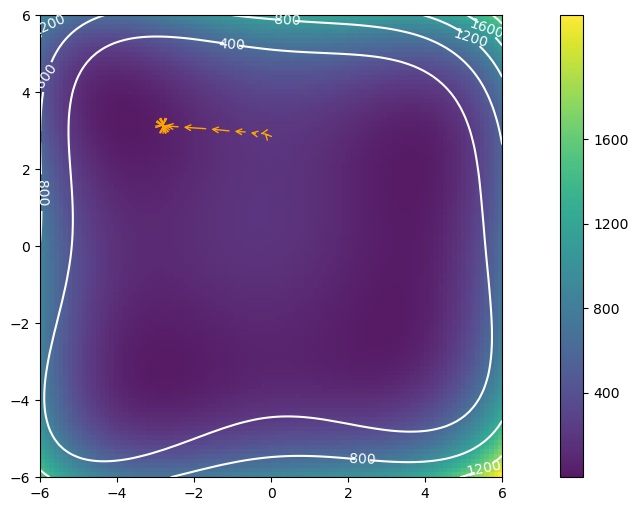

In [23]:
fig = plt.figure(3,figsize=(15, 6))
contours = plt.contour(x_mesh, y_mesh, z_mesh, 6, colors='white')
plt.clabel(contours)
plt.imshow(z_mesh, extent=[-6, 6, -6, 6], cmap='viridis', alpha=0.90)
plt.colorbar(ticks=np.arange(0, 2000, 400).tolist())
for iter in range(max_iter-1):
    xy_arrow0 = [x_array[iter], y_array[iter]]
    xy_arrow1 = [x_array[iter+1], y_array[iter+1]]
    plt.annotate('', xy=xy_arrow1, xytext=xy_arrow0,
                   arrowprops={'arrowstyle': '->', 'color': 'orange', 'lw': 1},
                   va='center', ha='center')

<div class="alert alert-block alert-info">
    
## Task 2: Study the behaviour of the GD when we initialize the algorithm from the following points 

</div>


In [24]:
display_quiz(questions[0:2])

<IPython.core.display.Javascript object>

iter:  0 : z -> 170.000, (x,y) ->(0.140,0.220)
iter:  1 : z -> 162.184, (x,y) ->(0.336,0.495)
iter:  2 : z -> 149.181, (x,y) ->(0.605,0.830)
iter:  3 : z -> 128.683, (x,y) ->(0.956,1.216)
iter:  4 : z -> 99.534, (x,y) ->(1.387,1.615)
iter:  5 : z -> 64.717, (x,y) ->(1.861,1.958)
iter:  6 : z -> 32.837, (x,y) ->(2.302,2.172)
iter:  7 : z -> 12.456, (x,y) ->(2.626,2.241)
iter:  8 : z -> 3.884, (x,y) ->(2.809,2.220)
iter:  9 : z -> 1.336, (x,y) ->(2.894,2.172)
iter: 10 : z -> 0.580, (x,y) ->(2.934,2.128)
iter: 11 : z -> 0.283, (x,y) ->(2.956,2.094)
iter: 12 : z -> 0.145, (x,y) ->(2.969,2.069)
iter: 13 : z -> 0.076, (x,y) ->(2.978,2.051)
iter: 14 : z -> 0.040, (x,y) ->(2.984,2.037)
iter: 15 : z -> 0.021, (x,y) ->(2.988,2.027)
iter: 16 : z -> 0.012, (x,y) ->(2.991,2.020)
iter: 17 : z -> 0.006, (x,y) ->(2.994,2.015)
iter: 18 : z -> 0.003, (x,y) ->(2.995,2.011)
iter: 19 : z -> 0.002, (x,y) ->(2.997,2.008)
iter: 20 : z -> 0.001, (x,y) ->(2.997,2.006)
iter: 21 : z -> 0.001, (x,y) ->(2.998,2.005

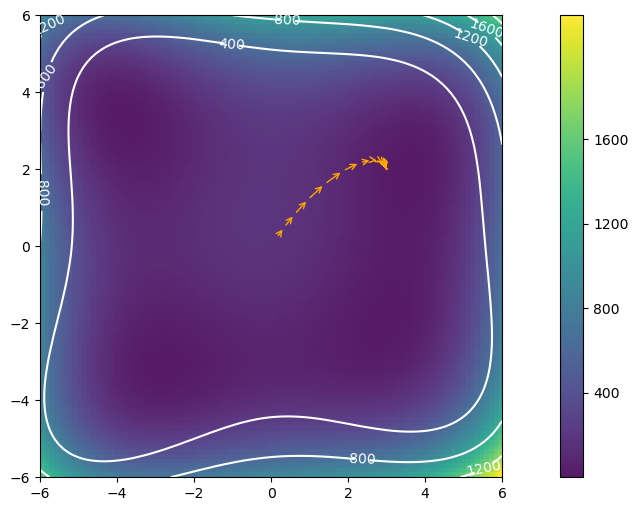

In [8]:
max_iter = 30
lr = 0.01 # eta in formulation above

x_GD, y_GD = 0,0
x_array, y_array,  z_array = [], [], [] #to store the path taken by GD

for iter in range(max_iter):
    tmp_z = Himmelblau_func(x_GD,y_GD)
    
    dzdx, dzdy = Himmelblau_grad(x_GD,y_GD)
    x_GD = x_GD - lr*dzdx
    y_GD = y_GD - lr*dzdy
    
    x_array.append(x_GD)
    y_array.append(y_GD)
    z_array.append(tmp_z)
    print(f'iter:{iter:3} : z -> {z_array[-1]:.3f}, (x,y) ->({x_array[-1]:.3f},{y_array[-1]:.3f})')



fig = plt.figure(3,figsize=(15, 6))
contours = plt.contour(x_mesh, y_mesh, z_mesh, 6, colors='white')
plt.clabel(contours)
plt.imshow(z_mesh, extent=[-6, 6, -6, 6], cmap='viridis', alpha=0.90)
plt.colorbar(ticks=np.arange(0, 2000, 400).tolist())
for iter in range(max_iter-1):
    xy_arrow0 = [x_array[iter], y_array[iter]]
    xy_arrow1 = [x_array[iter+1], y_array[iter+1]]
    plt.annotate('', xy=xy_arrow1, xytext=xy_arrow0,
                   arrowprops={'arrowstyle': '->', 'color': 'orange', 'lw': 1},
                   va='center', ha='center')    

iter:  0 : z -> 180.000, (x,y) ->(0.240,-1.000)
iter:  1 : z -> 175.799, (x,y) ->(0.700,-0.983)
iter:  2 : z -> 160.551, (x,y) ->(1.556,-0.943)
iter:  3 : z -> 111.384, (x,y) ->(2.924,-0.906)
iter:  4 : z -> 21.862, (x,y) ->(3.839,-1.007)
iter:  5 : z -> 12.073, (x,y) ->(3.086,-1.289)
iter:  6 : z -> 12.725, (x,y) ->(3.859,-1.411)
iter:  7 : z -> 7.477, (x,y) ->(3.139,-1.640)
iter:  8 : z -> 9.133, (x,y) ->(3.886,-1.682)
iter:  9 : z -> 5.916, (x,y) ->(3.146,-1.817)
iter: 10 : z -> 8.827, (x,y) ->(3.903,-1.781)
iter: 11 : z -> 6.018, (x,y) ->(3.134,-1.868)
iter: 12 : z -> 9.408, (x,y) ->(3.913,-1.803)
iter: 13 : z -> 6.308, (x,y) ->(3.122,-1.879)
iter: 14 : z -> 9.946, (x,y) ->(3.918,-1.806)
iter: 15 : z -> 6.521, (x,y) ->(3.113,-1.882)
iter: 16 : z -> 10.317, (x,y) ->(3.922,-1.806)
iter: 17 : z -> 6.655, (x,y) ->(3.107,-1.883)
iter: 18 : z -> 10.549, (x,y) ->(3.924,-1.806)
iter: 19 : z -> 6.735, (x,y) ->(3.104,-1.883)
iter: 20 : z -> 10.686, (x,y) ->(3.925,-1.806)
iter: 21 : z -> 6.78

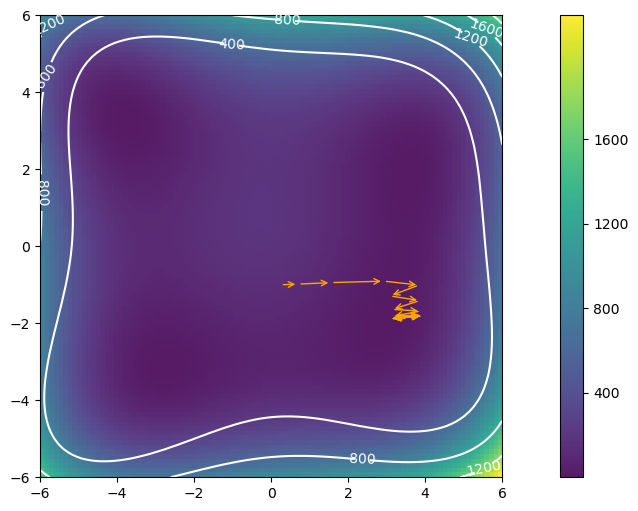

In [9]:
max_iter = 30
lr = 0.02 # eta in formulation above

x_GD, y_GD = 0,-1
x_array, y_array,  z_array = [], [], [] #to store the path taken by GD

for iter in range(max_iter):
    tmp_z = Himmelblau_func(x_GD,y_GD)
    
    dzdx, dzdy = Himmelblau_grad(x_GD,y_GD)
    x_GD = x_GD - lr*dzdx
    y_GD = y_GD - lr*dzdy
    
    x_array.append(x_GD)
    y_array.append(y_GD)
    z_array.append(tmp_z)
    print(f'iter:{iter:3} : z -> {z_array[-1]:.3f}, (x,y) ->({x_array[-1]:.3f},{y_array[-1]:.3f})')



fig = plt.figure(3,figsize=(15, 6))
contours = plt.contour(x_mesh, y_mesh, z_mesh, 6, colors='white')
plt.clabel(contours)
plt.imshow(z_mesh, extent=[-6, 6, -6, 6], cmap='viridis', alpha=0.90)
plt.colorbar(ticks=np.arange(0, 2000, 400).tolist())
for iter in range(max_iter-1):
    xy_arrow0 = [x_array[iter], y_array[iter]]
    xy_arrow1 = [x_array[iter+1], y_array[iter+1]]
    plt.annotate('', xy=xy_arrow1, xytext=xy_arrow0,
                   arrowprops={'arrowstyle': '->', 'color': 'orange', 'lw': 1},
                   va='center', ha='center')  

## GD for the Logistic Regression 



Recall for a sample $(\boldsymbol{x},y)$, the logistic loss is defined as
 
\begin{align*}
    \ell(y,\hat{y}) = -y \log(\sigma\big(\boldsymbol{w}^\top\boldsymbol{x})\big) -
    (1 - y) \log(1 - \sigma\big(\boldsymbol{w}^\top\boldsymbol{x})\big).
\end{align*}

Assume $w \in \mathbb{R}$ and hence the model has only one parameter to be determined. THerefore, 
\begin{align}
\sigma(\boldsymbol{w}^\top\boldsymbol{x}) = \frac{1}{1+\exp(-\boldsymbol{w}\boldsymbol{x})}
\end{align}


To update the parameters of the logistic model (i.e., $\boldsymbol{w}$), we need to obtain
\begin{align*}
    \frac{\partial}{\partial \boldsymbol{w}} \ell(y,\hat{y}) .
\end{align*}


<div class="alert alert-block alert-info">
    
## Task 3: Obtain the gradient of the logistic loss 

</div>

The solution is provided below (not sure if this markdown feature works for VS-Code) 


<details>
  <summary>Click to expand!</summary>

First note that,
\begin{align*}
    \frac{\partial}{\partial \boldsymbol{w}}\ell(y,\hat{y}) = -y \frac{\partial}{\partial \boldsymbol{w}} \log(\sigma\big(\boldsymbol{w}^\top\boldsymbol{x})\big) -
    (1 - y) \frac{\partial}{\partial \boldsymbol{w}}\log\big(1 - \sigma(\boldsymbol{w}^\top\boldsymbol{x})\big)
\end{align*}
    

    
First, we need to compute

\begin{align*}
    \frac{\partial}{\partial w} \sigma\big(\boldsymbol{w}\boldsymbol{x}\big) &= \frac{\partial}{\partial w} \frac{1}{1 + \exp(-wx)}\\
    &= \frac{x\exp(-wx)}{\big(1 + \exp(-wx)\big)^2}\\
    &= \boxed{x\sigma(wx)\big(1-\sigma(wx)\big)}\;.
\end{align*}

As such,
\begin{align*}
    \frac{\partial}{\partial \boldsymbol{w}} \log\big(\sigma(\boldsymbol{w}\boldsymbol{x})\big) &= 
    \frac{\frac{\partial}{\partial w} \sigma\big(\boldsymbol{w}\boldsymbol{x}\big)}{\sigma\big(\boldsymbol{w}\boldsymbol{x}\big)}\\
    &= \boxed{x\big(1-\sigma(wx)\big)}
\end{align*}



\begin{align*}
    \frac{\partial}{\partial \boldsymbol{w}} \log\big(1-\sigma(\boldsymbol{w}\boldsymbol{x})\big) &= 
    \frac{\frac{\partial}{\partial w} -\sigma\big(\boldsymbol{w}\boldsymbol{x}\big)}{1 - \sigma\big(\boldsymbol{w}\boldsymbol{x}\big)}\\
    &= \boxed{-x\sigma(wx)}
\end{align*}



Putting all together,
\begin{align*}
    \frac{\partial}{\partial \boldsymbol{w}}\ell(y,\hat{y}) &= -y \times x \big(1-\sigma(wx)\big) -
    (1 - y) \times -x\sigma(wx) \\ &=
    -yx +yx\sigma(wx) + x\sigma(wx) - yx\sigma(wx) = \boxed{\big(\sigma(wx) -y\big)x}\;.
\end{align*}  
</details>

<div class="alert alert-block alert-info">
    
## Task 4: Compare with Logistic Regression 

</div>

Compare your result with the logistic regression algorithm, can you see any similarities? Did you just develop the logistic regression algorithm?

![alt text](logistic_regression_pseudo_code.png)